In [1]:
import pandas as pd

archivos_demre = {
    2012: '1dw0KFah64rKdsb1oaqEGC0-6qafY4khl',
    2013: '1rkXXIxrX_5Y3ajjMWePZicH8V6M5wioF',
    2014: '1PTvgmLiUTNf-fZ5CiowjbZJz_c356aPx',
    2015: '1tKq6C8Cb-OVWcMibddcaVS-ruWG8RZ98',
    2016: '1FvcYDKS7vkR6YkDdl93Mwkws83WilMtA',
    2017: '1XGirhyVEEhgWdicYLq1jZ5ZOb8Cn99qX',
    2018: '1EVpqietS_JUYssi6xjfcnN-tXadocq1r',
}

lista_de_dataframes = []

print("Iniciando proceso de unificación...")

# Usamos un bucle para recorrer cada año y cada ID en nuestro diccionario.
for anio, file_id in archivos_demre.items():
    try:
        # Construimos la URL de descarga para el archivo actual
        url = f'https://drive.google.com/uc?export=download&id={file_id}'

        # Leemos el CSV desde la URL
        print(f"-> Cargando datos del año {anio}...")
        df_temporal = pd.read_csv(url, sep=';')

        # ¡Este es el paso clave! Creamos una nueva columna con el año.
        df_temporal['anio_proceso'] = anio

        # Agregamos el DataFrame de este año a nuestra lista.
        lista_de_dataframes.append(df_temporal)
        print(f"   ...Datos del año {anio} cargados con éxito.")

    except Exception as e:
        print(f"   !!! Error al cargar el año {anio}: {e}")


Iniciando proceso de unificación...
-> Cargando datos del año 2012...
   ...Datos del año 2012 cargados con éxito.
-> Cargando datos del año 2013...
   ...Datos del año 2013 cargados con éxito.
-> Cargando datos del año 2014...
   ...Datos del año 2014 cargados con éxito.
-> Cargando datos del año 2015...
   ...Datos del año 2015 cargados con éxito.
-> Cargando datos del año 2016...
   ...Datos del año 2016 cargados con éxito.
-> Cargando datos del año 2017...
   ...Datos del año 2017 cargados con éxito.
-> Cargando datos del año 2018...
   ...Datos del año 2018 cargados con éxito.


In [2]:
for i in lista_de_dataframes:
    print(i.columns)

Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROM_NOTAS', 'PTJE_NEM', 'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROM_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA', 'SITUACION_EGRESO',
       'CODIGO_REGION', 'CODIGO_COMUNA', 'LENG_ACTUAL', 'MATE_ACTUAL',
       'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 

In [3]:
columnas = [
    'ID_aux',
    'RBD',
    'GRUPO_DEPENDENCIA',
    'RAMA_EDUCACIONAL',
    'SITUACION_EGRESO',
    'CODIGO_REGION',
    'CODIGO_COMUNA',
    'PROMEDIO_NOTAS',
    'PTJE_NEM',
    'PTJE_RANKING',
    'LENG_ACTUAL',
    'MATE_ACTUAL',
    'HCSO_ACTUAL',
    'CIEN_ACTUAL',
    'anio_proceso'
]

#Verificacion de que las columnas seleccionadas tengas el mismo nombre

for i in lista_de_dataframes:
    for j in columnas:
        if j not in i.columns:
            print(j + f" año {i["anio_proceso"][0]}")

RAMA_EDUCACIONAL año 2012
PROMEDIO_NOTAS año 2012
PTJE_RANKING año 2012
RAMA_EDUCACIONAL año 2013
PROMEDIO_NOTAS año 2013
RAMA_EDUCACIONAL año 2014
PROMEDIO_NOTAS año 2014
RAMA_EDUCACIONAL año 2015
PROMEDIO_NOTAS año 2015
RAMA_EDUCACIONAL año 2016
PROMEDIO_NOTAS año 2016
RAMA_EDUCACIONAL año 2017
PROMEDIO_NOTAS año 2017


In [4]:
#Cambiamos las columnas respectivas

for i in lista_de_dataframes:
    if "RAMA" in i.columns:
        i.rename(columns={"RAMA" : "RAMA_EDUCACIONAL"}, inplace=True)
    if "PROM_NOTAS" in i:
        i.rename(columns={"PROM_NOTAS" : "PROMEDIO_NOTAS"}, inplace=True)

In [5]:
df_limpios = []

for df_año in lista_de_dataframes:
    columnas_dejar = [
    'ID_aux','RBD','GRUPO_DEPENDENCIA','RAMA_EDUCACIONAL','SITUACION_EGRESO','CODIGO_REGION','CODIGO_COMUNA',
    'PROMEDIO_NOTAS','PTJE_NEM','PTJE_RANKING','LENG_ACTUAL','MATE_ACTUAL','HCSO_ACTUAL','CIEN_ACTUAL','anio_proceso'
    ]

    #Se seleccionan las columnas que cada df tiene, ya que en admision 2012 no hay ranking porqwue se implementó por primera vez al año siguente
    limpieza_columnas = [col for col in columnas_dejar if col in df_año.columns] 

    df_limpios.append(df_año[limpieza_columnas])


In [6]:
for j in df_limpios:
    print(j.columns)

Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL',
       'CIEN_ACTUAL', 'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL',
       'CIEN_ACTUAL', 'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM'

In [7]:
df_final = pd.concat(df_limpios, ignore_index=True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799159 entries, 0 to 1799158
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID_aux             object 
 1   RBD                int64  
 2   GRUPO_DEPENDENCIA  float64
 3   RAMA_EDUCACIONAL   object 
 4   SITUACION_EGRESO   int64  
 5   CODIGO_REGION      float64
 6   CODIGO_COMUNA      float64
 7   PROMEDIO_NOTAS     object 
 8   PTJE_NEM           int64  
 9   LENG_ACTUAL        int64  
 10  MATE_ACTUAL        int64  
 11  HCSO_ACTUAL        int64  
 12  CIEN_ACTUAL        int64  
 13  anio_proceso       int64  
 14  PTJE_RANKING       float64
dtypes: float64(4), int64(8), object(3)
memory usage: 205.9+ MB


## Cambiamos los tipos de datos necesarios para que sea más acuerdo a lo que representa

In [8]:
mapa_renombre = {
        'ID_aux': 'id_estudiante',
        'RBD': 'id_colegio_rbd',
        'GRUPO_DEPENDENCIA': 'dependencia_colegio',
        'RAMA_EDUCACIONAL': 'rama_educacional',
        'SITUACION_EGRESO': 'situacion_egreso',
        'CODIGO_REGION': 'cod_region',
        'CODIGO_COMUNA': 'cod_comuna',
        'PROMEDIO_NOTAS': 'promedio_notas',
        'PTJE_NEM': 'puntaje_nem',
        'PTJE_RANKING': 'puntaje_ranking',
        'LENG_ACTUAL': 'puntaje_lectora',
        'CLEC_ACTUAL': 'puntaje_lectora',
        'CLEC_REG_ACTUAL': 'puntaje_lectora',

        'MATE_ACTUAL': 'puntaje_m1',
        'MATE1_REG_ACTUAL': 'puntaje_m1',

        'MATE2_REG_ACTUAL': 'puntaje_m2',

        'HCSO_ACTUAL': 'puntaje_historia',
        'HCSOC_REG_ACTUAL': 'puntaje_historia',

        'CIEN_ACTUAL': 'puntaje_ciencias',
        'CIEN_REG_ACTUAL': 'puntaje_ciencias',
        'MODULO_ACTUAL': 'tipo_ciencia',
        'MODULO_REG_ACTUAL': 'tipo_ciencia'
    }

    # Aplicamos el nuevo nombre de las columnas

df_final.rename(columns=mapa_renombre, inplace=True)

In [9]:
import numpy as np

df_final["id_colegio_rbd"] = df_final["id_colegio_rbd"].astype("category")
df_final["dependencia_colegio"] = df_final["dependencia_colegio"].astype("category")
df_final["rama_educacional"] = df_final["rama_educacional"].astype("category")
df_final["situacion_egreso"] = df_final["situacion_egreso"].astype("category")
df_final["cod_comuna"] = df_final["cod_comuna"].astype("category")
df_final["cod_region"] = df_final["cod_region"].astype("category")
df_final["promedio_notas"] = df_final["promedio_notas"].str.replace(',', '.').astype(float).replace(0.0, np.nan)
df_final["puntaje_nem"] = df_final["puntaje_nem"].replace(0, np.nan)
df_final["puntaje_ranking"] = df_final["puntaje_ranking"].replace(0, np.nan)
df_final["anio_proceso"] = df_final["anio_proceso"].astype("category")
df_final["puntaje_m1"] = df_final["puntaje_m1"].replace(0, np.nan)
df_final["puntaje_historia"] = df_final["puntaje_historia"].replace(0, np.nan)
df_final["puntaje_ciencias"] = df_final["puntaje_ciencias"].replace(0, np.nan)
df_final["puntaje_lectora"] = df_final["puntaje_lectora"].replace(0, np.nan)




In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799159 entries, 0 to 1799158
Data columns (total 15 columns):
 #   Column               Dtype   
---  ------               -----   
 0   id_estudiante        object  
 1   id_colegio_rbd       category
 2   dependencia_colegio  category
 3   rama_educacional     category
 4   situacion_egreso     category
 5   cod_region           category
 6   cod_comuna           category
 7   promedio_notas       float64 
 8   puntaje_nem          float64 
 9   puntaje_lectora      float64 
 10  puntaje_m1           float64 
 11  puntaje_historia     float64 
 12  puntaje_ciencias     float64 
 13  anio_proceso         category
 14  puntaje_ranking      float64 
dtypes: category(7), float64(7), object(1)
memory usage: 125.4+ MB


In [11]:
df_final.describe()

,promedio_notas,puntaje_nem,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,puntaje_ranking
count,273321.000000,1.786487e+06,1.724447e+06,1.712208e+06,1.024084e+06,1.044409e+06,1.546376e+06
mean,5.652525,5.428312e+02,5.009230e+02,5.014783e+02,5.011161e+02,5.012958e+02,5.642682e+02
std,0.485729,9.961311e+01,1.090504e+02,1.091014e+02,1.091039e+02,1.089158e+02,1.224304e+02
min,4.130000,2.080000e+02,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,2.080000e+02
25%,5.280000,4.660000e+02,4.270000e+02,4.250000e+02,4.270000e+02,4.280000e+02,4.680000e+02
50%,5.600000,5.340000e+02,5.010000e+02,5.020000e+02,4.990000e+02,5.020000e+02,5.430000e+02
75%,6.000000,6.160000e+02,5.740000e+02,5.740000e+02,5.740000e+02,5.740000e+02,6.490000e+02
max,7.000000,8.260000e+02,8.500000e+02,8.500000e+02,8.500000e+02,8.500000e+02,8.500000e+02


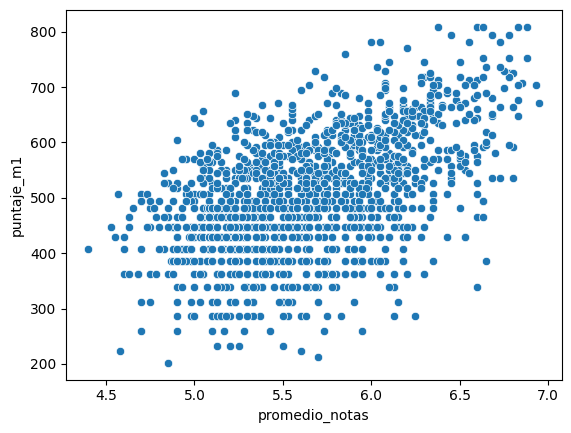

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df_muestra = df_final.sample(n=10000)

# Ahora haz el gráfico usando esta muestra más pequeña
sns.scatterplot(data=df_muestra, x="promedio_notas", y="puntaje_m1")
plt.show()

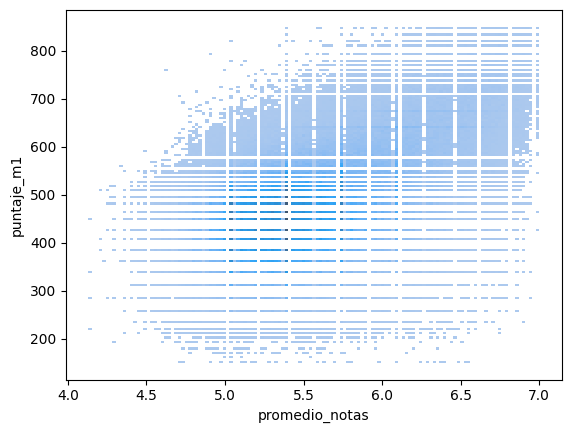

In [13]:
sns.histplot(data=df_final, x='promedio_notas', y='puntaje_m1')
plt.show()

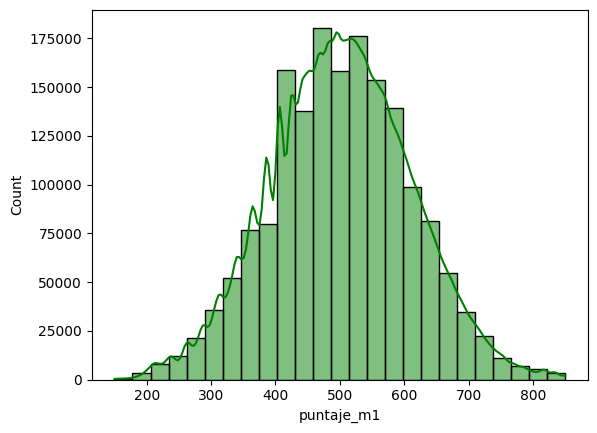

In [14]:
sns.histplot(data=df_final, x='puntaje_m1', kde=True, bins=25, color='green')

plt.show()

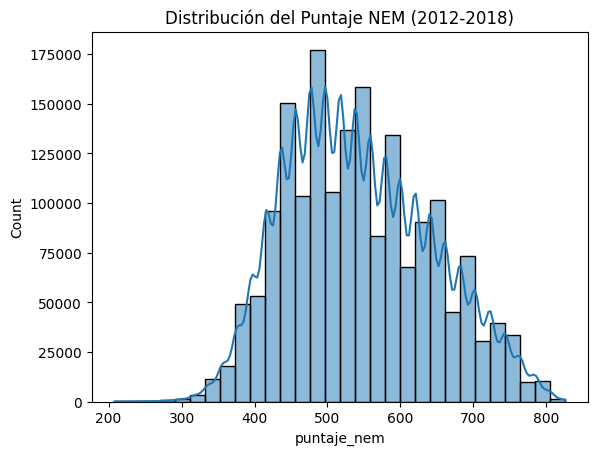

In [15]:
sns.histplot(data=df_final, x='puntaje_nem', bins=30, kde=True)
plt.title('Distribución del Puntaje NEM (2012-2018)')
plt.show()

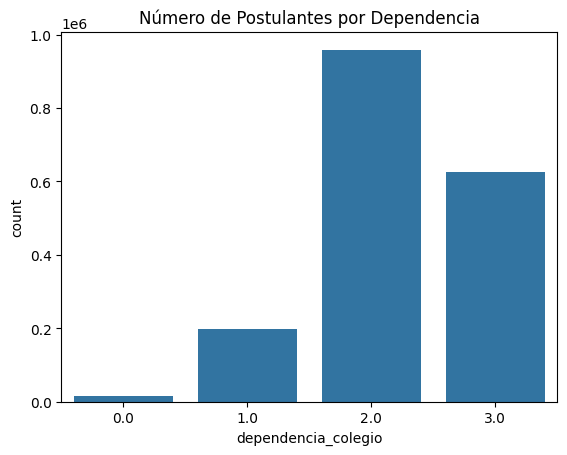

In [16]:
sns.countplot(data=df_final, x='dependencia_colegio')
plt.title('Número de Postulantes por Dependencia')
plt.show()

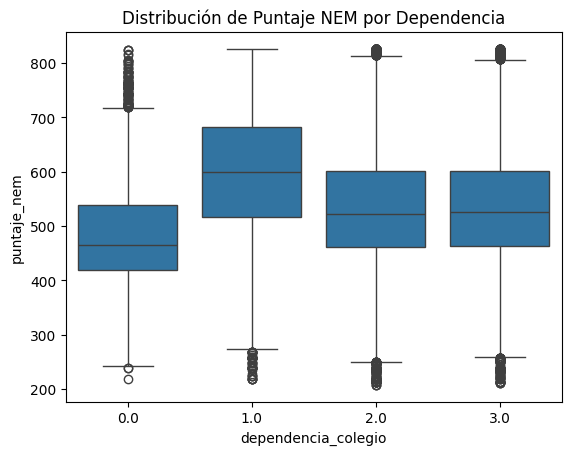

In [ ]:
sns.boxplot(data=df_final, x='dependencia_colegio', y='puntaje_nem')
plt.title('Distribución de Puntaje NEM por Dependencia')
plt.show() 